In [50]:
import numpy as np

# Function to compute the second derivative using finite differences for uneven intervals
def second_derivative_non_uniform(x, f_x):
    n = len(x)
    second_derivative = np.zeros(n)
    
    # For interior points (i.e. not the first or last)
    for i in range(1, n-1):
        h1 = x[i] - x[i-1]
        h2 = x[i+1] - x[i]
        second_derivative[i] = 2 * ((f_x[i+1] - f_x[i]) / h2 - (f_x[i] - f_x[i-1]) / h1) / (h1 + h2)
    
    # For boundary points: forward difference for the first, backward difference for the last
    # Forward difference for the first point (using f0, f1, and f2)
    h1 = x[1] - x[0]
    h2 = x[2] - x[1]
    second_derivative[0] = 2 * ((f_x[2] - f_x[1]) / h2 - (f_x[1] - f_x[0]) / h1) / (h1 + h2)
    
    # Backward difference for the last point (using f(n-3), f(n-2), f(n-1))
    h1 = x[-1] - x[-2]
    h2 = x[-2] - x[-3]
    second_derivative[-1] = 2 * ((f_x[-1] - f_x[-2]) / h1 - (f_x[-2] - f_x[-3]) / h2) / (h1 + h2)
    
    return second_derivative


# Read data from file (Function is incomplete)
def read_data(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()[2:]  # Skip the headers
        print(lines)
        data = [x.strip() for x in lines]  # Remove newline characters
        print(data)
        data = [x.split() for x in lines]
        print(data)    
        x = [float(x[0]) for x in data]
        f = [float(x[1]) for x in data]
        return np.array(x), np.array(f)

# Main function to test the second derivative computation
def driver():
    file_name = './Asssignment6_Q2.txt'
    
    try:
        # Read the data
        x, f = read_data(file_name)
        
        
        # Compute second derivatives
        second_derivative = second_derivative_non_uniform(x, f)

        # Print the results
        print("x         Second Derivative f''(x)")
        for i in range(len(x)):
            print(f"{x[i]:.2f}         {second_derivative[i]:.5f}")
    
    except FileNotFoundError:
        print(f"Error: The file {file_name} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
        
    return x , f , second_derivative

# Entry point
if __name__ == '__main__':
    driver()


['0.0         1.0\n', '0.3         1.3\n', '0.7         2.1\n', '1.2         2.7\n', '1.5         3.1\n', '2.0         4.0\n']
['0.0         1.0', '0.3         1.3', '0.7         2.1', '1.2         2.7', '1.5         3.1', '2.0         4.0']
[['0.0', '1.0'], ['0.3', '1.3'], ['0.7', '2.1'], ['1.2', '2.7'], ['1.5', '3.1'], ['2.0', '4.0']]
x         Second Derivative f''(x)
0.00         2.85714
0.30         2.85714
0.70         -1.77778
1.20         0.33333
1.50         1.16667
2.00         1.16667


['0.0         1.0\n', '0.3         1.3\n', '0.7         2.1\n', '1.2         2.7\n', '1.5         3.1\n', '2.0         4.0\n']
['0.0         1.0', '0.3         1.3', '0.7         2.1', '1.2         2.7', '1.5         3.1', '2.0         4.0']
[['0.0', '1.0'], ['0.3', '1.3'], ['0.7', '2.1'], ['1.2', '2.7'], ['1.5', '3.1'], ['2.0', '4.0']]
x         Second Derivative f''(x)
0.00         2.85714
0.30         2.85714
0.70         -1.77778
1.20         0.33333
1.50         1.16667
2.00         1.16667


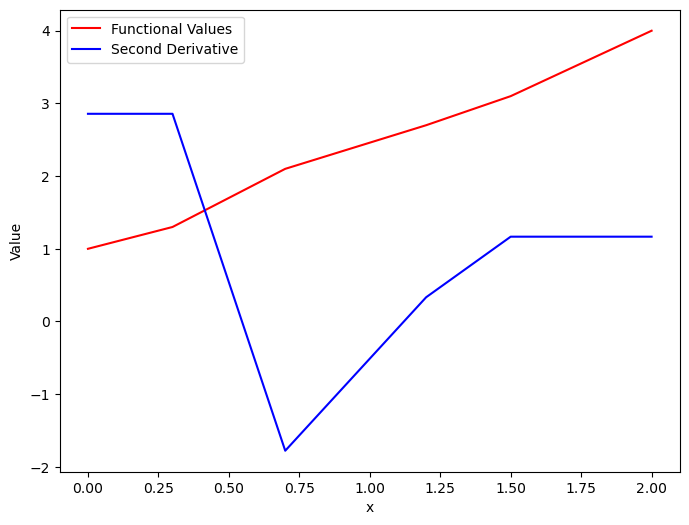

In [51]:
import matplotlib.pyplot as plt

x,f,ddf= driver()
plt.figure(figsize=(8, 6))  
plt.plot(x, f, 'r', label='Functional Values')
plt.plot(x, ddf, 'b', label='Second Derivative')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('Value')    
plt.show()

In [53]:
import pandas as pd 

df = pd.DataFrame({'x': x, 'f(x)': f, 'f"(x)': ddf})
df 

,x,f(x),"f""(x)"
0,0.0,1.0,2.857143
1,0.3,1.3,2.857143
2,0.7,2.1,-1.777778
3,1.2,2.7,0.333333
4,1.5,3.1,1.166667
5,2.0,4.0,1.166667
